<a href="https://colab.research.google.com/github/nmuzyka2004/test/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_Python_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика рекламных кампаний с помощью Pandas в Python

**Дано:**

Выгрузка с рекламной аналитикой за последние несколько недель по разным рекламных каналам.

**Что нужно сделать:**

1. Загрузить данные, почистить их и привести в пригодный для обработки вид
2. Посчитать основные рекламные метрики в разрезе каждого рекламного канала
3. Принять управленческие решения

## Загружаем данные

In [1]:
!wget https://gist.githubusercontent.com/andron23/f0ef92f6eae15b148f703fedf21121e7/raw/27be9b20a2eb668df8535d81fc628751ed1c553b/vk.csv

--2023-07-18 14:28:46--  https://gist.githubusercontent.com/andron23/f0ef92f6eae15b148f703fedf21121e7/raw/27be9b20a2eb668df8535d81fc628751ed1c553b/vk.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1047 (1.0K) [text/plain]
Saving to: ‘vk.csv’

vk.csv              100%[===================>]   1.02K  --.-KB/s    in 0s      

2023-07-18 14:28:46 (90.4 MB/s) - ‘vk.csv’ saved [1047/1047]



In [2]:
!wget https://gist.githubusercontent.com/andron23/bae617f82d16691584e392136e054719/raw/468bf0879b362fabbb78ce05254b05c5943700de/inst.csv

--2023-07-18 14:28:49--  https://gist.githubusercontent.com/andron23/bae617f82d16691584e392136e054719/raw/468bf0879b362fabbb78ce05254b05c5943700de/inst.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1085 (1.1K) [text/plain]
Saving to: ‘inst.csv’

inst.csv            100%[===================>]   1.06K  --.-KB/s    in 0s      

2023-07-18 14:28:50 (78.1 MB/s) - ‘inst.csv’ saved [1085/1085]



In [ ]:
!pip install pandas

In [3]:
import pandas as pd

In [4]:
vk = pd.read_csv('vk.csv', sep=';', decimal=',')

In [5]:
inst = pd.read_csv('inst.csv', sep=';', decimal=',')

In [6]:
vk

,date,spent,impressions,clicks,leads,qualleads,customers
0,28.05.2023,3267.00,18084,93,27,0,0
1,29.05.2023,3615.00,22764,60,18,0,1
2,30.05.2023,1692.00,9753,27,9,3,0
3,31.05.2023,1539.00,8412,24,6,6,0
4,01.06.2023,2769.00,15633,42,6,3,0
5,02.06.2023,3630.00,18615,57,18,9,0
6,03.06.2023,4317.00,19926,69,33,18,0
7,04.06.2023,3930.00,18702,81,45,9,0
8,05.06.2023,2769.00,12303,63,24,0,0
9,06.06.2023,3.00,6,0,0,0,0


In [7]:
vk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         30 non-null     object 
 1   spent        30 non-null     float64
 2   impressions  30 non-null     int64  
 3   clicks       30 non-null     int64  
 4   leads        30 non-null     int64  
 5   qualleads    30 non-null     int64  
 6   customers    30 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ KB


In [8]:
inst.head(1)

,date,spent,impressions,clicks,leads,qualleads,customers
0,27.05.2023,5143.2,17052,174,78,0,0


In [ ]:
vk.describe()

,spent,impressions,clicks,leads,qualleads,customers
count,30.000000,30.000000,30.00000,30.00000,30.000000,30.000000
mean,4402.852000,22288.600000,70.50000,27.20000,6.600000,0.200000
std,1976.429464,13066.744139,35.52925,12.67743,6.795536,0.406838
min,3.000000,6.000000,0.00000,0.00000,0.000000,0.000000
25%,3287.250000,13063.500000,42.75000,19.50000,0.750000,0.000000
50%,4035.000000,19314.000000,72.00000,27.00000,3.000000,0.000000
75%,5971.582500,29982.000000,90.75000,39.00000,11.250000,0.000000
max,8687.040000,55440.000000,156.00000,48.00000,24.000000,1.000000


In [9]:
vk['placement'] = 'vk'
inst['placement'] = 'inst'

In [10]:
vk.head(1)

,date,spent,impressions,clicks,leads,qualleads,customers,placement
0,28.05.2023,3267.0,18084,93,27,0,0,vk


In [11]:
df = pd.concat([vk, inst]).sort_values(['date', 'placement'])

In [ ]:
df.head(1)

,date,spent,impressions,clicks,leads,qualleads,customers,placement
5,01.06.2023,12000.0,74040,426,93,30,0,inst


## Считаем CTR

CTR - click through rate: процент конверсии из показа в клик

In [12]:
df['ctr'] = df['clicks'] / df.impressions

In [13]:
df

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr
5,01.06.2023,12000.00,74040,426,93,30,0,inst,0.005754
4,01.06.2023,2769.00,15633,42,6,3,0,vk,0.002687
6,02.06.2023,11572.80,68424,345,84,39,0,inst,0.005042
5,02.06.2023,3630.00,18615,57,18,9,0,vk,0.003062
7,03.06.2023,11671.20,71520,321,72,39,0,inst,0.004488
6,03.06.2023,4317.00,19926,69,33,18,0,vk,0.003463
8,04.06.2023,9456.00,65382,273,54,27,0,inst,0.004175
7,04.06.2023,3930.00,18702,81,45,9,0,vk,0.004331
9,05.06.2023,3590.40,11325,111,45,12,0,inst,0.009801
8,05.06.2023,2769.00,12303,63,24,0,0,vk,0.005121


## Считаем CR1

CR1 - conversion rate 1: конверсия из клика в лид

In [14]:
df['cr1'] = df['leads'] / df['clicks']

In [ ]:
df.head()

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1
5,01.06.2023,12000.0,74040,426,93,30,0,inst,0.005754,0.218310
4,01.06.2023,2769.0,15633,42,6,3,0,vk,0.002687,0.142857
6,02.06.2023,11572.8,68424,345,84,39,0,inst,0.005042,0.243478
5,02.06.2023,3630.0,18615,57,18,9,0,vk,0.003062,0.315789
7,03.06.2023,11671.2,71520,321,72,39,0,inst,0.004488,0.224299


## Считаем CPL

CPL - cost per lead, стоимость лида

In [15]:
df['cpl'] = df['spent'] / df['leads']

In [16]:
df.head(1)

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl
5,01.06.2023,12000.0,74040,426,93,30,0,inst,0.005754,0.21831,129.032258


## Считаем CPQL

CPQL - cost per qualified lead, стоимость квалифицированного лида

In [17]:
df['cpql'] = df['spent'] / df['qualleads']

In [18]:
df.head(1)

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl,cpql
5,01.06.2023,12000.0,74040,426,93,30,0,inst,0.005754,0.21831,129.032258,400.0


## Считаем CR-Q

CR-Q - конверсия из лида в квалифицированного лида

In [19]:
df['cr-q'] = df['qualleads'] / df['leads']

In [20]:
df.head(5)

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl,cpql,cr-q
5,01.06.2023,12000.0,74040,426,93,30,0,inst,0.005754,0.218310,129.032258,400.000000,0.322581
4,01.06.2023,2769.0,15633,42,6,3,0,vk,0.002687,0.142857,461.500000,923.000000,0.500000
6,02.06.2023,11572.8,68424,345,84,39,0,inst,0.005042,0.243478,137.771429,296.738462,0.464286
5,02.06.2023,3630.0,18615,57,18,9,0,vk,0.003062,0.315789,201.666667,403.333333,0.500000
7,03.06.2023,11671.2,71520,321,72,39,0,inst,0.004488,0.224299,162.100000,299.261538,0.541667


## Считаем CPC

CPC - cost per click, стоимость одного клика

In [21]:
df['cpc'] = df['spent'] / df['clicks']

In [22]:
df.tail(5)

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl,cpql,cr-q,cpc
1,29.05.2023,3615.0,22764,60,18,0,1,vk,0.002636,0.300000,200.833333,inf,0.000000,60.250000
3,30.05.2023,12000.0,70803,285,84,21,0,inst,0.004025,0.294737,142.857143,571.428571,0.250000,42.105263
2,30.05.2023,1692.0,9753,27,9,3,0,vk,0.002768,0.333333,188.000000,564.000000,0.333333,62.666667
4,31.05.2023,12000.0,59940,348,123,33,0,inst,0.005806,0.353448,97.560976,363.636364,0.268293,34.482759
3,31.05.2023,1539.0,8412,24,6,6,0,vk,0.002853,0.250000,256.500000,256.500000,1.000000,64.125000


## Дополнительная очистка

In [23]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df = df.replace([np.inf, -np.inf], np.nan)

In [24]:
df.tail()

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl,cpql,cr-q,cpc
1,29.05.2023,3615.0,22764,60,18,0,1,vk,0.002636,0.300000,200.833333,NaN,0.000000,60.250000
3,30.05.2023,12000.0,70803,285,84,21,0,inst,0.004025,0.294737,142.857143,571.428571,0.250000,42.105263
2,30.05.2023,1692.0,9753,27,9,3,0,vk,0.002768,0.333333,188.000000,564.000000,0.333333,62.666667
4,31.05.2023,12000.0,59940,348,123,33,0,inst,0.005806,0.353448,97.560976,363.636364,0.268293,34.482759
3,31.05.2023,1539.0,8412,24,6,6,0,vk,0.002853,0.250000,256.500000,256.500000,1.000000,64.125000


## Агрегируем

Считаем среднее/медианное значение CTR, CPL, CPQL по каждому рекламному каналу и среднедневной расход

In [25]:
df.groupby('placement').agg({
    'ctr': 'mean',
    'cpl': 'mean'
})

,ctr,cpl
placement,,
inst,0.005776,157.851592
vk,0.003323,182.336182


In [26]:
df.groupby('placement').agg({
    'clicks': ['sum', 'mean'],
    'impressions': ['sum', 'mean']
})

clicks        impressions         
             sum   mean         sum     mean
placement                                   
inst        5946  198.2     1116363  37212.1
vk          2115   70.5      668658  22288.6

In [32]:
df2 = df.groupby('placement').agg({
    'clicks': [
        ('sum_clicks', 'sum'),
        ('mean_clicks', 'mean')
    ],
    'impressions': [
        ('sum_impressions', 'sum'),
        ('mean_impressions', 'mean')
    ],
    'spent': [
        ('total_spent', 'sum'),
        ('mean_spent', 'mean')
    ],
    'leads': [('cnt_leads', 'sum')],
    'qualleads': [('cnt_qual', 'sum')],
    'customers': [('cnt_customers', 'sum')],
}).reset_index()

df2.columns = df2.columns.droplevel(0)
df2

,,sum_clicks,mean_clicks,sum_impressions,mean_impressions,total_spent,mean_spent,cnt_leads,cnt_qual,cnt_customers
0,inst,5946,198.2,1116363,37212.1,225086.40,7502.880,1659,426,4
1,vk,2115,70.5,668658,22288.6,132085.56,4402.852,816,198,6


In [33]:
df2['crq'] = df2['cnt_qual'] / df2['cnt_leads']
df2['cpql'] = df2['total_spent'] / df2['cnt_qual']
df2['cpl'] = df2['total_spent'] / df2['cnt_leads']
df2['cpc'] = df2['total_spent'] / df2['sum_clicks']
df2['cr1'] = df2['cnt_leads'] / df2['sum_clicks']

df2['cr2'] = df2['cnt_customers'] / df2['cnt_leads']
df2['cac'] = df2['total_spent'] / df2['cnt_customers']

In [34]:
df2

,,sum_clicks,mean_clicks,sum_impressions,mean_impressions,total_spent,mean_spent,cnt_leads,cnt_qual,cnt_customers,crq,cpql,cpl,cpc,cr1,cr2,cac
0,inst,5946,198.2,1116363,37212.1,225086.40,7502.880,1659,426,4,0.256781,528.371831,135.675949,37.855096,0.279011,0.002411,56271.60
1,vk,2115,70.5,668658,22288.6,132085.56,4402.852,816,198,6,0.242647,667.098788,161.869559,62.451801,0.385816,0.007353,22014.26


Домашка

Загрузить файл
 https://gist.githubusercontent.com/andron23/57efe40e7ef578d01c2f48497eea29bf/raw/d89cd282d0c6350246799db6b402d3391541d0a1/sales.csv

Добавить информацию о сумме продаж к исходному датафрейму

Сделать агрегацию и посчитать метрику ARPU в разрезе рекламных каналов

Сделать новые управленческие выводы на основании новой информации


In [35]:
!wget https://gist.githubusercontent.com/andron23/57efe40e7ef578d01c2f48497eea29bf/raw/d89cd282d0c6350246799db6b402d3391541d0a1/sales.csv

--2023-07-18 15:51:39--  https://gist.githubusercontent.com/andron23/57efe40e7ef578d01c2f48497eea29bf/raw/d89cd282d0c6350246799db6b402d3391541d0a1/sales.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225 [text/plain]
Saving to: ‘sales.csv’

sales.csv           100%[===================>]     225  --.-KB/s    in 0s      

2023-07-18 15:51:39 (12.8 MB/s) - ‘sales.csv’ saved [225/225]



In [36]:
import pandas as pd

sales = pd.read_csv('sales.csv', decimal='.', sep=';')

In [37]:
sales

,date,placement,rubs
0,06.06.2023,inst,95600
1,09.06.2023,inst,34300
2,18.06.2023,inst,59000
3,20.06.2023,inst,19400
4,29.05.2023,vk,35200
5,08.06.2023,vk,35200
6,09.06.2023,vk,9450
7,13.06.2023,vk,9450
8,17.06.2023,vk,14500
9,21.06.2023,vk,14500


Нам нужно соединить две таблицы - исходный датафрейм df и новый sales. Если вы знакомы с SQL, то нам нужно сделать аналог операции JOIN. Если знакомы с Excel - то ВПР.

В Pandas это делается с помощью метода merge.

У нас 2 общих столбца в каждом датафрейме - date и placement. Именно по ним нужно соединять. Это указывается с помощью аргументов left_on и right_on.

Также мы указываем аргумент how='outer', чтобы оставить не только те строки, в которых найдено соответствие (т.е. только дни, в которые были продажи), а вообще все строки. Если в какой-то день продажи не было, то в итоговой таблице там будет NaN.

In [44]:
df = df.merge(sales, left_on=['date', 'placement'], right_on=['date', 'placement'], how='outer')
df

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl,cpql,cr-q,cpc,rubs_x,rubs_y,rubs
0,01.06.2023,12000.00,74040,426,93,30,0,inst,0.005754,0.218310,129.032258,400.000000,0.322581,28.169014,NaN,NaN,NaN
1,01.06.2023,2769.00,15633,42,6,3,0,vk,0.002687,0.142857,461.500000,923.000000,0.500000,65.928571,NaN,NaN,NaN
2,02.06.2023,11572.80,68424,345,84,39,0,inst,0.005042,0.243478,137.771429,296.738462,0.464286,33.544348,NaN,NaN,NaN
3,02.06.2023,3630.00,18615,57,18,9,0,vk,0.003062,0.315789,201.666667,403.333333,0.500000,63.684211,NaN,NaN,NaN
4,03.06.2023,11671.20,71520,321,72,39,0,inst,0.004488,0.224299,162.100000,299.261538,0.541667,36.358879,NaN,NaN,NaN
5,03.06.2023,4317.00,19926,69,33,18,0,vk,0.003463,0.478261,130.818182,239.833333,0.545455,62.565217,NaN,NaN,NaN
6,04.06.2023,9456.00,65382,273,54,27,0,inst,0.004175,0.197802,175.111111,350.222222,0.500000,34.637363,NaN,NaN,NaN
7,04.06.2023,3930.00,18702,81,45,9,0,vk,0.004331,0.555556,87.333333,436.666667,0.200000,48.518519,NaN,NaN,NaN
8,05.06.2023,3590.40,11325,111,45,12,0,inst,0.009801,0.405405,79.786667,299.200000,0.266667,32.345946,NaN,NaN,NaN
9,05.06.2023,2769.00,12303,63,24,0,0,vk,0.005121,0.380952,115.375000,NaN,0.000000,43.952381,NaN,NaN,NaN


Снова делаем агрегирование, добавляя на этот раз сумму покупок в столбец sales.

In [46]:
df2 = df.groupby('placement').agg({
    'clicks': [
        ('sum_clicks', 'sum'),
        ('mean_clicks', 'mean')
    ],
    'impressions': [
       ('sum_impressions', 'sum'),
       ('mean_impressions', 'mean')
    ],
    'spent': [
        ('spent_daily', 'mean'),
        ('spent_total', 'sum')
    ],
    'leads': [('cnt_leads', 'sum')],
    'qualleads': [('cnt_qual', 'sum')],
    'customers': [('customers_sum', 'sum')],
    'rubs': [('sales', 'sum')]
}).reset_index()

df2.columns = df2.columns.droplevel(0)
df2

,,sum_clicks,mean_clicks,sum_impressions,mean_impressions,spent_daily,spent_total,cnt_leads,cnt_qual,customers_sum,sales
0,inst,5946,198.2,1116363,37212.1,7502.880,225086.40,1659,426,4,208300.0
1,vk,2115,70.5,668658,22288.6,4402.852,132085.56,816,198,6,118300.0


ARPU - average revenue per user, средний доход с покупателя. В нашем случае это средний чек.

Считаем ARPU как отношение суммы покупок к количеству покупателей.

In [47]:
df2['mean_crq'] = df2['cnt_qual'] / df2['cnt_leads']
df2['mean_cpql'] = df2['spent_total'] / df2['cnt_qual']
df2['mean_cpl'] = df2['spent_total'] / df2['cnt_leads']
df2['mean_cr1'] = df2['cnt_leads'] / df2['sum_clicks']
df2['mean_cpc'] = df2['spent_total'] / df2['sum_clicks']
df2['cac'] = df2['spent_total'] / df2['customers_sum']
df2['cr2'] = df2['customers_sum'] / df2['cnt_leads']

df2['arpu'] = df2['sales'] / df2['customers_sum']

In [48]:
df2

,,sum_clicks,mean_clicks,sum_impressions,mean_impressions,spent_daily,spent_total,cnt_leads,cnt_qual,customers_sum,sales,mean_crq,mean_cpql,mean_cpl,mean_cr1,mean_cpc,cac,cr2,arpu
0,inst,5946,198.2,1116363,37212.1,7502.880,225086.40,1659,426,4,208300.0,0.256781,528.371831,135.675949,0.279011,37.855096,56271.60,0.002411,52075.000000
1,vk,2115,70.5,668658,22288.6,4402.852,132085.56,816,198,6,118300.0,0.242647,667.098788,161.869559,0.385816,62.451801,22014.26,0.007353,19716.666667


Ранее мы сделали вывод, что хоть ВК и работает хуже, там намного ниже стоимость клиента.

Однако теперь мы наблюдаем обратное - оказывается, в ВК мы с клиента зарабатываем очень мало, в то время как с Инстаграма - в 3 раза больше (хоть клиентов там и меньше).

Получается, нам снова нужно поменять наше управленческое решение - теперь давайте точно останавливать ВК и реинвестировать в Инстаграм! 😱

Однако, перед этим давайте посчитаем - а в итоге-то какой рекламный канал приносит нам больше денег. Посчитаем прибыль как разность заработанных и потраченных денег.

In [49]:
df2['profit'] = df2['sales'] - df2['spent_total']
df2

,,sum_clicks,mean_clicks,sum_impressions,mean_impressions,spent_daily,spent_total,cnt_leads,cnt_qual,customers_sum,sales,mean_crq,mean_cpql,mean_cpl,mean_cr1,mean_cpc,cac,cr2,arpu,profit
0,inst,5946,198.2,1116363,37212.1,7502.880,225086.40,1659,426,4,208300.0,0.256781,528.371831,135.675949,0.279011,37.855096,56271.60,0.002411,52075.000000,-16786.40
1,vk,2115,70.5,668658,22288.6,4402.852,132085.56,816,198,6,118300.0,0.242647,667.098788,161.869559,0.385816,62.451801,22014.26,0.007353,19716.666667,-13785.56


И наблюдаем забавную ситуацию - оба канала пока работают в минус 😁 Получается, нужно отключить оба канала.

На самом деле, ситуация очень непростая, но по факту вполне себе реальная - редко в жизни встречаются однозначные ответы.

Мы предлагаем на основании проведенного анализа такие рекомендации:

Нужно увеличить CR1 в Инстаграме - это позволит снизить стоимость лида, а значит и CAC при тех же конверсиях. Например, изменить текст рекламных объявлений - судя по всему, у людей не сходится ожидание/реальность и они не оставляют заявки на сайте.
Нужно снизить CPC в ВК - это также повлияет на снижение CAC. Например, можно попробовать более яркие объявления или другую аудиторию.
Бюджет пока можно нигде не увеличивать - слишком все пока шатко.
Нужно увеличить CR2 в Инстаграме - за счет этого CAC будет сильно меньше. Для этого внутри воронки нужно усилить прогрев - людям недостаточно мотивации покупать. Также стоит провести кастдев (исследование) людей из Инстаграма - раз на той же воронке люди из ВК покупают нормально, видимо, что-то не так с аудиторией из Инстаграма. Иногда дело может быть в мелочах - люди могут просто не знать, что вы принимаете оплаты из-за рубежа.
Нужно увеличить ARPU в ВК - за счет этого прибыль с клиента будет больше. Почему-то люди из ВК не видят для себя ценности покупать более дорогой тариф. Нужно отредактировать воронку - добавить туда сообщений, которые убеждают купить более дорогой тариф. Также можно пообщаться с уже купившими - почему они выбрали дешевый тариф, может быть что-то станет понятно.


## Фишки

In [ ]:
df.head()

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl,cpql,cr-q,cpc
5,01.06.2023,12000.0,74040,426,93,30,0,inst,0.005754,0.218310,129.032258,400.000000,0.322581,28.169014
4,01.06.2023,2769.0,15633,42,6,3,0,vk,0.002687,0.142857,461.500000,923.000000,0.500000,65.928571
6,02.06.2023,11572.8,68424,345,84,39,0,inst,0.005042,0.243478,137.771429,296.738462,0.464286,33.544348
5,02.06.2023,3630.0,18615,57,18,9,0,vk,0.003062,0.315789,201.666667,403.333333,0.500000,63.684211
7,03.06.2023,11671.2,71520,321,72,39,0,inst,0.004488,0.224299,162.100000,299.261538,0.541667,36.358879


In [ ]:
pd.set_option('display.max_rows', 1)

In [ ]:
df

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl,cpql,cr-q,cpc
5,01.06.2023,12000.0,74040,426,93,30,0,inst,0.005754,0.21831,129.032258,400.0,0.322581,28.169014


In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
df

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl,cpql,cr-q,cpc
5,01.06.2023,12000.0,74040,426,93,30,0,inst,0.005754,0.21831,129.032258,400.0,0.322581,28.169014


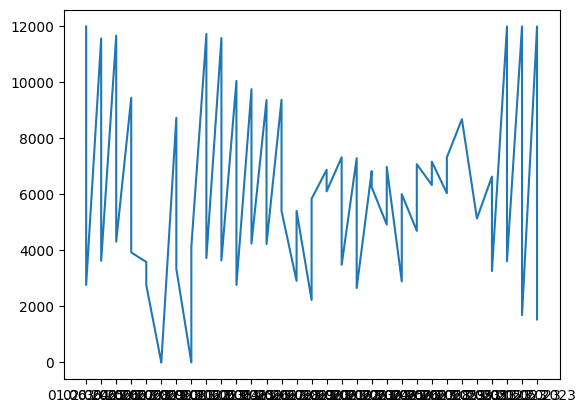

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['date'], df['spent'])

In [ ]:
df3 = df[df['placement'] == 'vk']

In [ ]:
df3

,date,spent,impressions,clicks,leads,qualleads,customers,placement,ctr,cr1,cpl,cpql,cr-q,cpc
4,01.06.2023,2769.0,15633,42,6,3,0,vk,0.002687,0.142857,461.5,923.0,0.5,65.928571


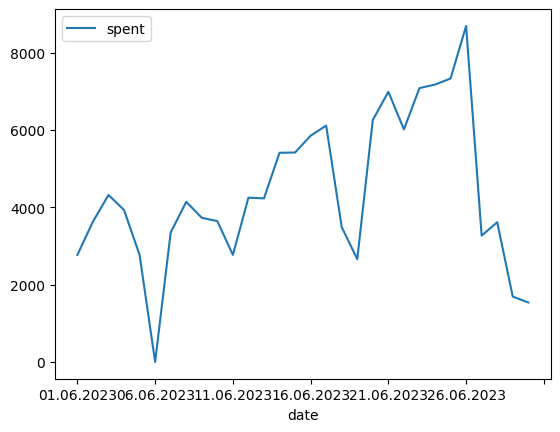

In [ ]:
df3.plot('date', 'spent');

# Домашка

1. Загрузить файл https://gist.githubusercontent.com/andron23/57efe40e7ef578d01c2f48497eea29bf/raw/d89cd282d0c6350246799db6b402d3391541d0a1/sales.csv
2. Добавить информацию о сумме продаж к исходному датафрейму
3. Сделать агрегацию и посчитать метрику ARPU в разрезе рекламных каналов
4. Сделать новые управленческие выводы на основании новой информации